# Six Degrees of Kevin Bacon

![kevin](Kevin_Bacon.jpg)


1994.godine glumac Kevin Bacon je u intervjuu izjavio da je radio sa svakim glumcem u Hollywoodu ili s nekim tko je s njime radio.

Temeljem toga inspirirana je igra koja svakom glumcu pridružuje *Bacon*-ov broj koji govori koliko je osoba udaljena od Kevina Bacona s obzirom na osobe s kojima je surađivala na filmovima.
* Kevin Bacon ima Baconov broj 0
* Osoba koja je direktno surađivala s njime 1
* Ako je najmanji Baconov broj od svih osoba s kojima je neka osoba surađivala N onda je njen Baconov broj N+1

Npr. Ian McKellen je glumio u *X-Men:Days of Future Past(2014)* s Michaelom Fassbenderom i Jamesom McAvoyem, a McAvoy i Fassbender su glumili s Baconom u *X-Men: First Class (2011)*. Stoga McAvoy i Fassbender imaju Baconov broj 1 dok McKellen ima Baconov broj 2.

Pretpostavka je da ni za jednog glumca ovaj broj ne prelazi 6. Naziv je inspiriran s 6 stupnjeva separacije ili pravilom 6 rukovanja koje kaže da su bilo koja dva čovjeka udaljena poznanstvima u najviše šest koraka.

Kevin Bacon je 2007. godine pokrenuo dobrotvornu udrugu [Six Degrees](https://en.wikipedia.org/wiki/SixDegrees.org).

Prikažimo glumce kao vrhove u grafu gdje povezanost bridom znači da su dva glumca glumila zajedno u nekom filmu. Npr.

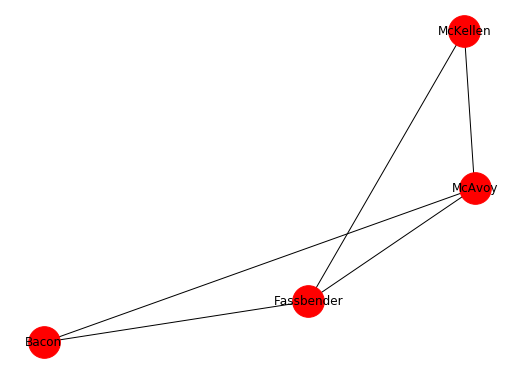

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

g=nx.Graph()
g.add_edge('Bacon','Fassbender')
g.add_edge('Bacon','McAvoy') 
g.add_edge('Fassbender','McAvoy')
g.add_edge('Fassbender','McKellen')
g.add_edge('McAvoy','McKellen')

pos = nx.spiral_layout(g)
plt.figure(figsize=(7,5))
nx.draw(g, pos, node_size=1000, with_labels=True, node_color='r')
plt.show()

## Implementacija

Odredimo Baconove brojeve na skupu od 9235 glumaca i 7067 filmova. Podatke sam preuzeo za stranice [link](https://www.cs.dartmouth.edu/~cbk/classes/10/14winter/hws.php?hw=PS-5). U datoteci `bacon.zip` nalaze se tekstualne datoteke `actors.txt` u kojoj su redci oblika: **id_glumca | ime_glumca**, `movies.txt` u kojoj su redci oblika **id_filma | ime_filma(godina)** te `movie-actors.txt` u kojoj su redci oblika **id_filma | id_glumca** što označava da je glumac s brojem **id_glumca** glumio u filmu s brojem **id_filma**.

Najprije izvucimo te podatke u rječnike **id_movies** u kojem su ključevi id filmova a vrijednosti imena filmova, **id_actors** gdje su ključevi id glumaca a vrijednosti imena glumaca te **movies_actors** koji glumcu s nekim id-om pridužuje id-eve svih filmova u kojima je glumio i obratno i **actors_movies** koji id-u filma pridružuje id-eve svih glumaca iz datoteke koji su glumili u tom filmu.

In [ ]:
def to_pair1(line):
    key, value=line.rstrip('\n').split('|')
    return int(key),value

def to_pair2(line):
    key, value=line.rstrip('\n').split('|')
    return int(key),int(value)

with open('movies.txt','r',encoding="utf8") as f:
    id_movies=dict(map(to_pair1,f))

with open('actors.txt','r',encoding="utf8") as f:
    id_actors=dict(map(to_pair1,f))

In [ ]:
from collections import defaultdict 
movies_actors=defaultdict(list)
actors_movies=defaultdict(list)
with open('movie-actors.txt','r') as f:
    for line in f:
        pair=to_pair2(line)
        movies_actors[pair[0]].append(pair[1])
        actors_movies[pair[1]].append(pair[0])   

Sada možemo napraviti rječnik incidencije koji id-u svakog glumca pridružuje listu id-eva glumaca s kojima je glumio u nekom filmu 

In [ ]:
actor_adj=defaultdict(list)
for actor1 in id_actors.keys():
    for movie in actors_movies[actor1]:
        for actor2 in movies_actors[movie]:
            if actor2!=actor1:
                actor_adj[actor1].append(actor2)

Od rječnika incidencije kreiramo graf koji ćemo nazvati **suradnje**:

In [ ]:
import networkx as nx
suradnje=nx.Graph()
for actor,lista in actor_adj.items():
    for actor2 in lista:
        suradnje.add_edge(actor,actor2)

## BFS (Breadth-First Search)

Baconove brojeve ćemo tražiti koristeći BFS algoritam pretraživanja u širinu.

BFS krečući iz nekog vrha pretražuje najprije njegove susjede a zatim ide na sljedeću dubinu gdje pretražuje susjede susjeda itd.

Sljedeća funkcija **bfs(graf,start)** za *graf* vraća sve vrhove dostupne iz vrha *start*.

In [2]:
import queue
               
def bfs(graf, start):
    dostizni=set()
    q=queue.Queue()
    q.put(start)
    
    while not q.empty():
        trenutni = q.get()
        if trenutni not in dostizni:
            dostizni.add(trenutni)
            for susjed in graf[trenutni]:
                q.put(susjed)
    return dostizni


Ako krećemo iz nekog fiksnog vrha i tražimo put to nekog drugog vrha jasno je da ćemo ovakvim načinom pretraživanja stvarno naći najkraći put između ta dva vrha jer da to nije najkraći put onda bi na traženi vrh naišli kao susjeda na nižoj dubini.

Funkcija **bfs_put(graf,start,kraj)** krečući od vrha *start* u *grafu* nalazi najkraći put do vrha *kraj* i vraća ga kao listu.

In [ ]:
def bfs_put(graf, start, kraj):
    visit_queue = queue.Queue()
    visit_queue.put([start])
    marked= set([start])

    while not visit_queue.empty():
        visited = visit_queue.get()
        trenutni= visited[-1]
        if trenutni == kraj:
            return visited
        for susjed in graf[trenutni]:
            if susjed not in marked:
                marked.add(susjed)
                visit_queue.put(visited + [susjed])

Pogledajmo na primjeru što vraćaju ove dvije funkcije.

# tu unesi pr

In [ ]:
dostizni=bfs(suradnje,63)
nedostizni=0
bacon=defaultdict(list)
for actor in suradnje.nodes():
    if actor in dostizni:
        bacon[len(bfs_put(suradnje,actor,63))-1].append(actor)
    else:
        nedostizni+=1

frekvencije=defaultdict(int)
for broj,lista in bacon.items():
    frekvencije[broj]=len(lista)
frekvencije['nedostinzi']=nedostizni

## crtanje histograma, srednji bacon...

## Mali svijet

Ja se neću ovdje baviti koliki je Baconov broj svakog glumca već ću kroz jedan model pokušati objasniti zašto je svijet tako mali.

Prikažimo glumce kao vrhove u grafu gdje bridovi predstavljaju filmove u kojem su dva glumca glumila zajedno. Npr. 

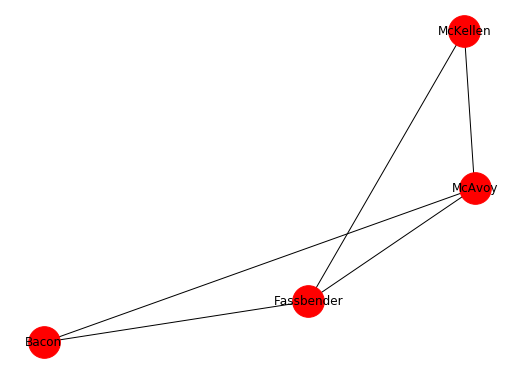

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

g=nx.Graph()
g.add_edge('Bacon','Fassbender')
g.add_edge('Bacon','McAvoy') 
g.add_edge('Fassbender','McAvoy')
g.add_edge('Fassbender','McKellen')
g.add_edge('McAvoy','McKellen')

pos = nx.spiral_layout(g)
plt.figure(figsize=(7,5))
nx.draw(g, pos, node_size=1000, with_labels=True, node_color='r')
plt.show()

In [36]:
red=[]
susjedi = g['Bacon']

for susjed in susjedi:
    red.append(susjed)
    
red

['Fassbender', 'McAvoy']

## Scale free network
Stupanj vrha je broj bridova koji iz njega izlazi.

Distribucija stupnjeva je vjerojatnosna distribucija stupnjeva u cijelom grafu. To jest distribucija stupnja $P(k)$ je udio vrhova u grafu koji imaju stupanj $k$. Odnosno ako u grafu s $n$ vrhova ima $n_{k}$ vrhova stupnja k tada je $P(k)=\frac{n_{k}}{n}$

Za graf kažemo da je *scale-free* ako distribucija stupnjeva zadovoljava *power law* odnosno oblika je $P(k)=\alpha x^{-k}$

Promotrimo model koji generira *scale-free* graf.

## Barabasi-Albert model

Krećemo s grafom od $m_{0}$ čvorova koji mogu biti proizvoljno povezani.
* **Rast**: u svakom koraku dodajemo novi vrh koji povežemo s $m$ vrhova koji su već u grafu
* **Preferential attachment**: vjerojatnost da se novi vrh poveže s vrhom $i$ je $\pi(k_{i})=\frac{k_{i}}{\sum k_{i}}$ gdje je $k_{i}$ stupanj vrha i.


In [24]:
import numpy as np

def display_graph(G):
    pos=nx.circular_layout(G)
    n=G.number_of_nodes()
    boje=['g' for k in range(n-1)]
    boje.append('r')
    g=G.subgraph(np.arange(n-1))
    node_pr=node_prob(g)
    deg_cent=nx.degree_centrality(g)
    node_size=[2500*v for v in deg_cent.values()]
    node_size.append(1000)
    nx.draw(G,pos,node_color=boje,edge_color='black',node_size=node_size)
    
    labels={}
    for k in range(n-1):
        labels[k]=f'{node_pr[k]:.2f}'
    labels[n-1]='novi'    
    nx.draw_networkx_labels(G,pos,labels)
    nx.draw_networkx_edges(G,pos,edgelist=list(G.edges(i)),edge_color='r')
    
    return
   
    
def node_prob(G):
    degrees=np.array(nx.degree(G))[:,1]
    l=2*len(G.edges())
    node_pr=degrees/l
    
    return node_pr


def add_node(G,i,m):
    node_pr=node_prob(G)
    cumulative_node_prob=[]
    it=0
    for p in node_pr:
        cumulative_node_prob.append(it+p)
        it=it+p

    G.add_node(i)
   
    num_edges_added=0
    selected_nodes=[]
    #new_edges=[]

    while(num_edges_added<m):
        node_it=0
        u=np.random.uniform(0,1)
        while(u>cumulative_node_prob[node_it]):
            node_it+=1

        selected_node=node_it
        
        if selected_node in selected_nodes:
            continue
        
        selected_nodes.append(selected_node)

        G.add_edge(i,selected_node)
        num_edges_added+=1
        #new_edges.append((i,selected_node))
    
    return 

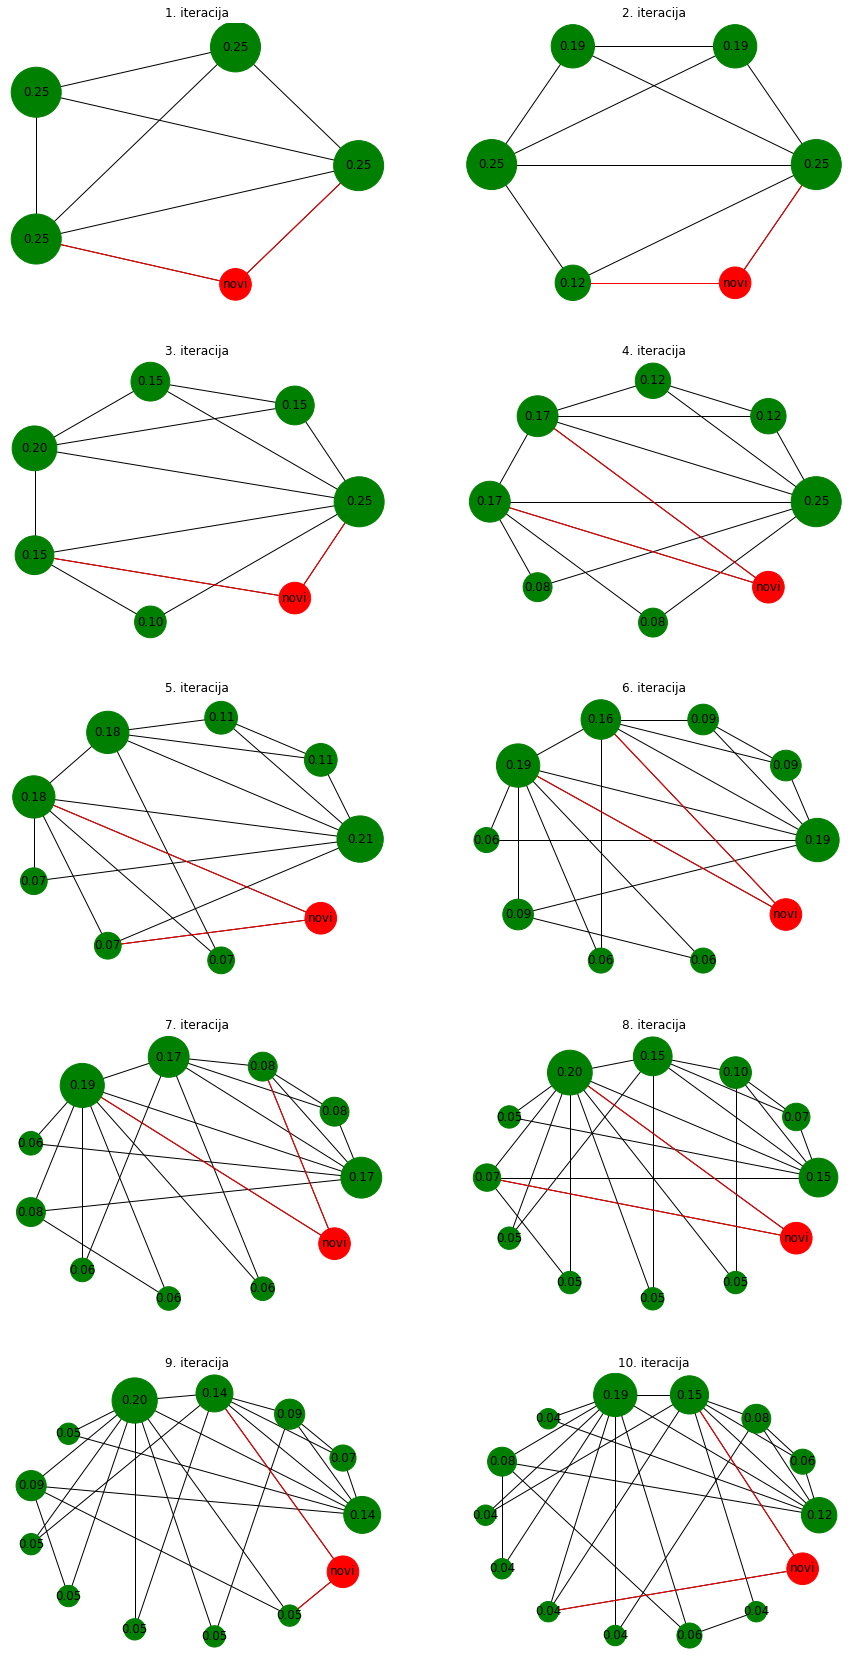

In [25]:

plt.rcParams['figure.figsize'] = [15,30]
m0=4
m=2
n=14

g=nx.complete_graph(m0)
for i in range(m0,n):
    add_node(g,i,m)
    plt.subplot(5,2,i-3)
    plt.title(f'{i-3}. iteracija')
    display_graph(g)

plt.show()
      

In [26]:
def plot_deg_dist(G,m,b):
    all_degrees=np.array(nx.degree(G))[:,1]
    different_degrees=np.array(list(set(all_degrees)))
    
    max=different_degrees.max()
    min=different_degrees.min()
    l=len(all_degrees)
        
    counts=np.bincount(all_degrees)
    no_zero_counts=counts[np.nonzero(counts)]
    prob_of_degrees=no_zero_counts/l
            
    x=np.arange(min,max+1)
    c=2*m*m
    y=c*1/x**3
    
    xn=x[y>=1/l]
    yn=y[y>=1/l]

    plt.loglog(different_degrees,prob_of_degrees,'ro',basex=10,basey=10)
    plt.plot(xn,yn,'--c')
    plt.xlabel('k')
    plt.ylabel('pk')
    plt.title(f'Distribucija stupnjeva nakon {b} koraka')
    plt.show()

In [27]:
def plot_degree_dynamics(G,t,stupnjevi_0,stupnjevi_100,stupnjevi_1000,stupnjevi_5000):
    x0=np.arange(t+1)
    x100=np.arange(100,t+1)
    x1000=np.arange(1000,t+1)
    x5000=np.arange(5000,t+1)

    x=np.arange(G.number_of_nodes())
    y=4*x**(1/2)
    
    plt.loglog(x0,stupnjevi_0,'red',basex=10,basey=10)
    plt.loglog(x100,stupnjevi_100,'blue',basex=10,basey=10)
    plt.loglog(x1000,stupnjevi_1000,'green',basex=10,basey=10)
    plt.loglog(x5000,stupnjevi_5000,'black',basex=10,basey=10)
    plt.plot(x,y,'--c')
    plt.xlabel('t')
    plt.ylabel('k(t)')
    plt.title('Stupnjevi vrhova dodanih u trenutcima 0,100,1000,5000')
    plt.show()

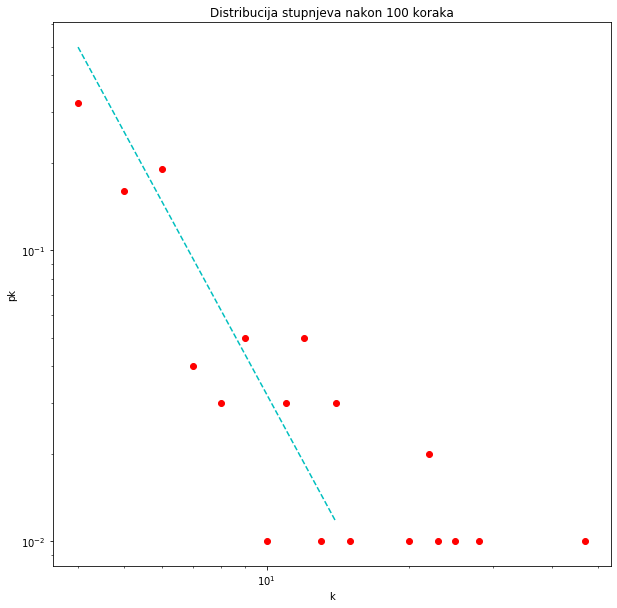

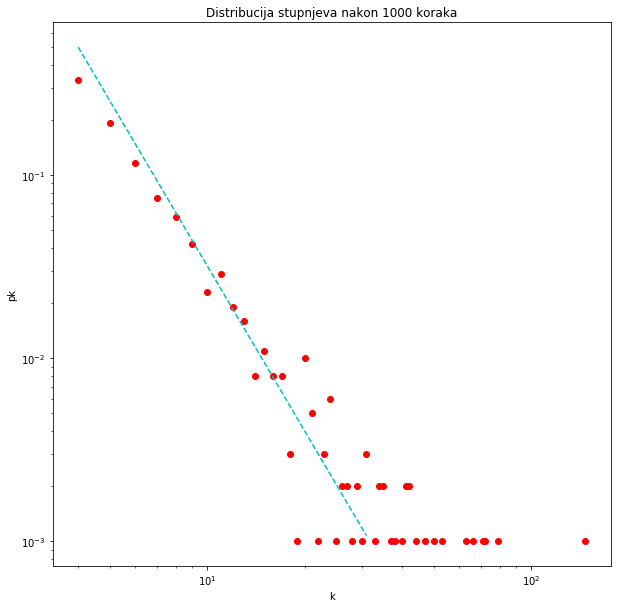

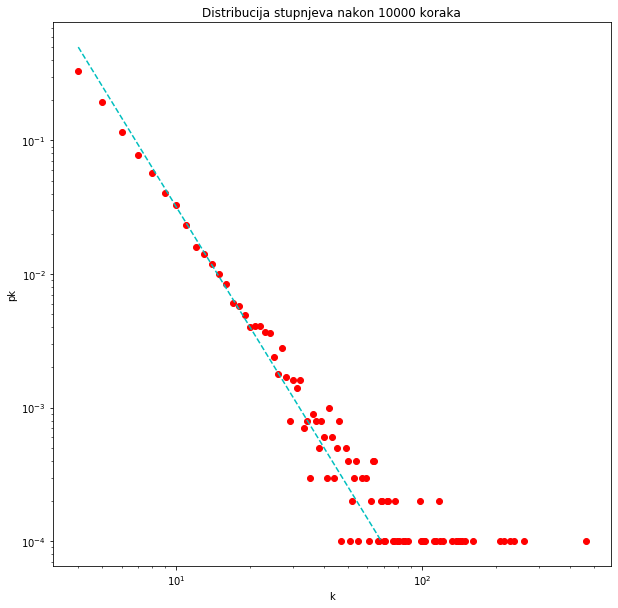

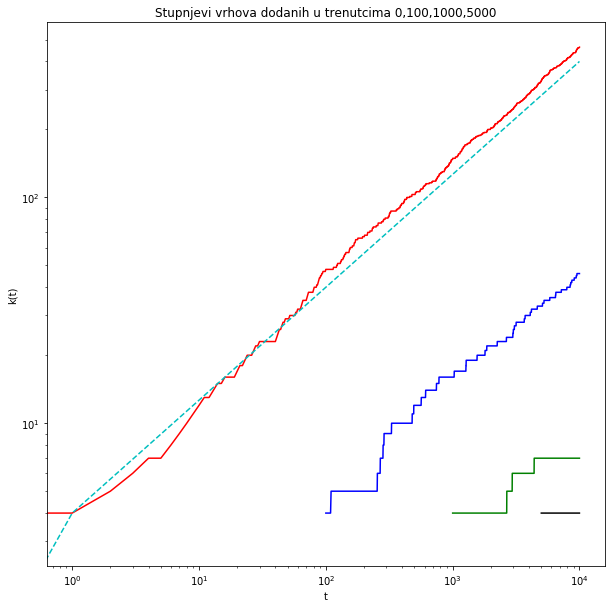

Wall time: 2min 4s


In [28]:
%%time
plt.rcParams['figure.figsize'] = [10,10]
n=10000
m0=4
m=4
G=nx.complete_graph(m0)
stupnjevi_0=[]
stupnjevi_100=[]
stupnjevi_1000=[]
stupnjevi_5000=[]
stupnjevi_0.append(m0-1)

for i in range(m0,n):
    t=i-m0+1
    add_node(G,i,m)
    if t>=100:
        stupnjevi_100.append(G.degree(103))
    if t>=1000:
        stupnjevi_1000.append(G.degree(1003))
    if t>=5000:
        stupnjevi_5000.append(G.degree(5003))
    stupnjevi_0.append(G.degree(0))
    if(i==99 or i==999 or i==9999):
        plot_deg_dist(G,m,i+1)

plot_degree_dynamics(G,t,stupnjevi_0,stupnjevi_100,stupnjevi_1000,stupnjevi_5000)

In [30]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 10000\nNumber of edges: 39990\nAverage degree:   7.9980'

In [29]:
nx.diameter(G)

KeyboardInterrupt: 

In [108]:
nx.average_clustering(G)

0.006349660559368202

In [109]:
nx.average_shortest_path_length(G)

3.889227502750275

Pratimo promjenu stupnja vrha $i$ kroz vrijeme.

$\frac{\partial k_{i}}{\partial t}\propto m \frac{k_{i}}{\sum_{i=1}^{N-1} k_{i}}$

gdje je $t$ vremenski korak a N ukupan broj čvorova u grafu. Naime u svakom koraku dodajemo $m$ novih bridova a svaki ima vjerojatnost $\frac{k_{i}}{\sum_{i=1}^{N-1} k_{i}}$ da se poveže s $i$. ...

# test

In [68]:
%%time 
node_pr=node_prob(G)

CPU times: user 65.7 ms, sys: 3.97 ms, total: 69.7 ms
Wall time: 82.9 ms


In [72]:
%%time
cumulative_node_prob=[]
it=0
for p in node_pr:
    cumulative_node_prob.append(it+p)
    it=it+p
node_it=0
u=np.random.uniform(0,1)        
while(u>cumulative_node_prob[node_it]):
    node_it+=1

selected_node=node_it
print(selected_node)

4475
CPU times: user 23.1 ms, sys: 0 ns, total: 23.1 ms
Wall time: 23.3 ms


In [89]:
%%time
g=nx.complete_graph(4)
for i in range(4,5000):
    add_node(g,i,4)
    if i%100==0: print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
CPU times: user 1min 20s, sys: 59.9 ms, total: 1min 20s
Wall time: 1min 20s


In [80]:
G.number_of_nodes()

10000

In [81]:
%%time
add_node(G,10000,4)

CPU times: user 93.4 ms, sys: 4 ms, total: 97.5 ms
Wall time: 110 ms
